In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import yfinance as yf
import numpy as np

In [3]:
# Ratings DataFrame + cleaning
df_brands = pd.read_csv("ratings.csv")

# Clean the "Overall rating" column
df_brands["Overall rating"] = df_brands["Overall rating"].apply(lambda x: x.replace("Rated: ", ""))

# Clean the "Planet rating" column
df_brands["Planet rating"] = (df_brands["Planet rating"].astype(str).str.extract(r"(\d)\s*out of\s*5").astype(float).astype("Int64"))

# Clean the "People rating" column
df_brands["People rating"] = (df_brands["People rating"].astype(str).str.extract(r"(\d)\s*out of\s*5").astype(float).astype("Int64"))

# Clean the "Animals rating" column
df_brands["Animals rating"] = (df_brands["Animals rating"].astype(str).str.extract(r"(\d)\s*out of\s*5").astype(float).astype("Int64"))

# Add information about the numerical overall rating
rating_mapping = {"We avoid": 1,
                  "Not good enough": 2,
                  "It's a start": 3,
                  "Good": 4,
                  "Great": 5
                 }
df_brands["Overall rating numerical"] = df_brands["Overall rating"].map(rating_mapping)

# Create a new column with index positions at the Lyst Index 
lyst_rank = {"Miu Miu": 1,
            "Loewe": 2,
            "Saint Laurent": 3,
            "Prada": 4,
            "Coach": 5,
            "The Row": 6,
            "Cos": 7,
            "Chloe": 8,
            "Bottega Veneta": 9,
            "Moncler": 10,
            "Ralph Lauren": 11,
            "Alaia": 12,
            "Balenciaga": 13,
            "Jacquemus": 14,
            "Skims": 15,
            "Versace": 16,
            "Burberry": 17,
            "Gucci": 18,
            "Birkenstock": 19,
            "Valentino": 20
            }
df_brands["Lyst position"] = df_brands["Brand"].map(lyst_rank)

# Create a new column with holding company names
holding_company = {"Miu Miu": "Prada Group",
                     "Loewe": "LVMH",
                     "Saint Laurent": "Kering",
                     "Prada": "Prada Group",
                     "Coach": "Tapestry Inc.",
                     "The Row": "Private - Olsen twins",
                     "Cos": "H&M Group",
                     "Chloe": "Richemont",
                     "Bottega Veneta": "Kering",
                     "Moncler": "Moncler S.p.A.",
                     "Ralph Lauren": "Ralph Lauren Corporation",
                     "Alaia": "Richemont",
                     "Balenciaga": "Kering",
                     "Jacquemus": "Private - Simon Porte Jacquemus",
                     "Skims": "Private - Kim Kardashian",
                     "Versace": "Capri Holdings",
                     "Burberry": "Burberry Group plc",
                     "Gucci": "Kering",
                     "Birkenstock": "Private Equity - L Catterton & Financière Agache",  
                     "Valentino": "Private Equity - Mayhoola"
                     }      
df_brands["Holding"] = df_brands["Brand"].map(holding_company)

# Create a new column with information about market exchanges
exchanges = {"Miu Miu": "Hong Kong Stock Exchange",
                     "Loewe": "Euronext Paris",
                     "Saint Laurent": "Euronext Paris",
                     "Prada": "Hong Kong Stock Exchange",
                     "Coach": "NYSE",
                     "The Row": "",
                     "Cos": "Nasdaq Stockholm",
                     "Chloe": "SIX Swiss Exchange",
                     "Bottega Veneta": "Euronext Paris",
                     "Moncler": "Borsa Italiana",
                     "Ralph Lauren": "NYSE",
                     "Alaia": "SIX Swiss Exchange",
                     "Balenciaga": "Euronext Paris",
                     "Jacquemus": "",
                     "Skims": "",
                     "Versace": "NYSE",
                     "Burberry": "London Stock Exchange",
                     "Gucci": "Euronext Paris",
                     "Birkenstock": "NYSE",  
                     "Valentino": ""
                     }      
df_brands["Market exchange"] = df_brands["Brand"].map(exchanges)

# Create a new column with tickers of holding companies
tickers_holding_company = {"Miu Miu": "1913.HK",
                     "Loewe": "MC.PA",
                     "Saint Laurent": "KER.PA",
                     "Prada": "1913.HK",
                     "Coach": "TPR",
                     "The Row": "",
                     "Cos": "HM-B.ST",
                     "Chloe": "CFR.SW",
                     "Bottega Veneta": "KER.PA",
                     "Moncler": "MONC.MI",
                     "Ralph Lauren": "RL",
                     "Alaia": "CFR.SW",
                     "Balenciaga": "KER.PA",
                     "Jacquemus": "",
                     "Skims": "",
                     "Versace": "CPRI",
                     "Burberry": "BRBY.L",
                     "Gucci": "KER.PA",
                     "Birkenstock": "BIRK",  
                     "Valentino": ""
                     }      
df_brands["Ticker holding"] = df_brands["Brand"].map(tickers_holding_company)

# Reorder columns
df_brands = df_brands[['Lyst position','Brand', 'Holding','Market exchange', 'Ticker holding','Overall rating numerical', 'Overall rating', 'Planet rating', 'People rating',
       'Animals rating']]

df_brands     


,Lyst position,Brand,Holding,Market exchange,Ticker holding,Overall rating numerical,Overall rating,Planet rating,People rating,Animals rating
0,1,Miu Miu,Prada Group,Hong Kong Stock Exchange,1913.HK,2,Not good enough,3,3,1
1,2,Loewe,LVMH,Euronext Paris,MC.PA,2,Not good enough,3,2,1
2,3,Saint Laurent,Kering,Euronext Paris,KER.PA,3,It's a start,4,3,2
3,4,Prada,Prada Group,Hong Kong Stock Exchange,1913.HK,3,It's a start,3,3,2
4,5,Coach,Tapestry Inc.,NYSE,TPR,2,Not good enough,3,2,1
5,6,The Row,Private - Olsen twins,,,1,We avoid,1,1,2
6,7,Cos,H&M Group,Nasdaq Stockholm,HM-B.ST,3,It's a start,3,2,3
7,8,Chloe,Richemont,SIX Swiss Exchange,CFR.SW,3,It's a start,3,3,2
8,9,Bottega Veneta,Kering,Euronext Paris,KER.PA,3,It's a start,4,4,2
9,10,Moncler,Moncler S.p.A.,Borsa Italiana,MONC.MI,3,It's a start,4,2,2


C:\Users\igrav\AppData\Local\Temp\ipykernel_6156\3131783935.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Overall rating numerical', y='Brand', data=df_brands, palette='viridis')


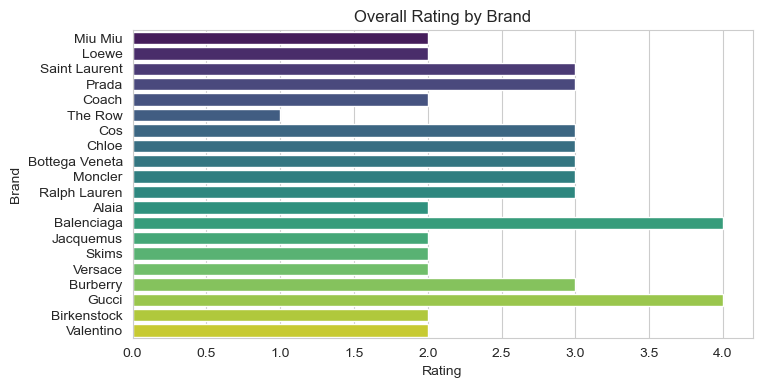

In [4]:
# Create some graphs to visualize the ratings data
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create a bar plot for the overall ratings
plt.figure(figsize=(8, 4))
sns.barplot(x='Overall rating numerical', y='Brand', data=df_brands, palette='viridis')
plt.title('Overall Rating by Brand')
plt.xlabel('Rating')
plt.ylabel('Brand')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6180\1419460014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Planet rating', y='Brand', data=df_brands, palette='magma')


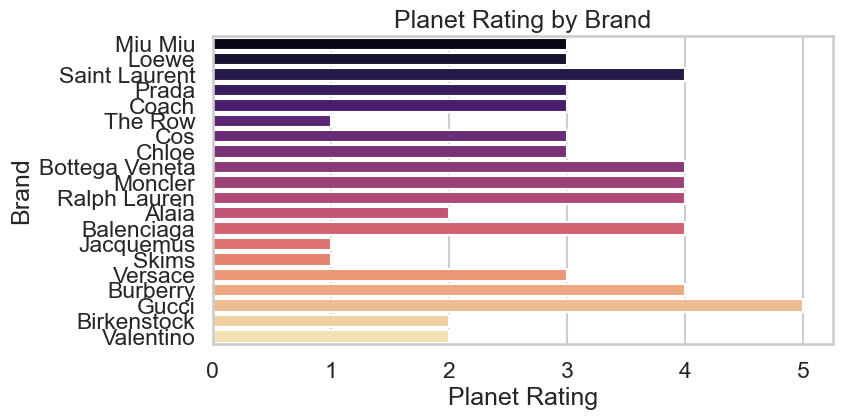

In [33]:
# Now create a bar plot for the Planet ratings
plt.figure(figsize=(8, 4))
sns.barplot(x='Planet rating', y='Brand', data=df_brands, palette='magma')
plt.title('Planet Rating by Brand')
plt.xlabel('Planet Rating')
plt.show()  

C:\Users\DELL\AppData\Local\Temp\ipykernel_6180\719775815.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='People rating', y='Brand', data=df_brands, palette='magma')


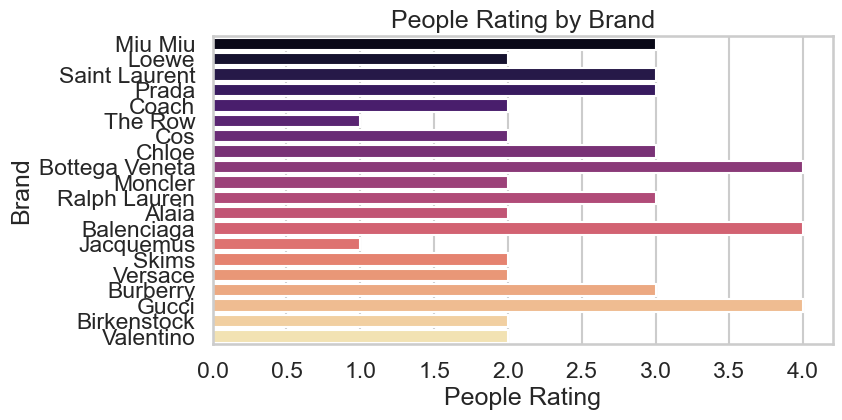

In [34]:
# Now create a bar plot for the People ratings
plt.figure(figsize=(8, 4))
sns.barplot(x='People rating', y='Brand', data=df_brands, palette='magma')
plt.title('People Rating by Brand')
plt.xlabel('People Rating')
plt.show()  

C:\Users\DELL\AppData\Local\Temp\ipykernel_6180\3047470235.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Animals rating', y='Brand', data=df_brands, palette='magma')


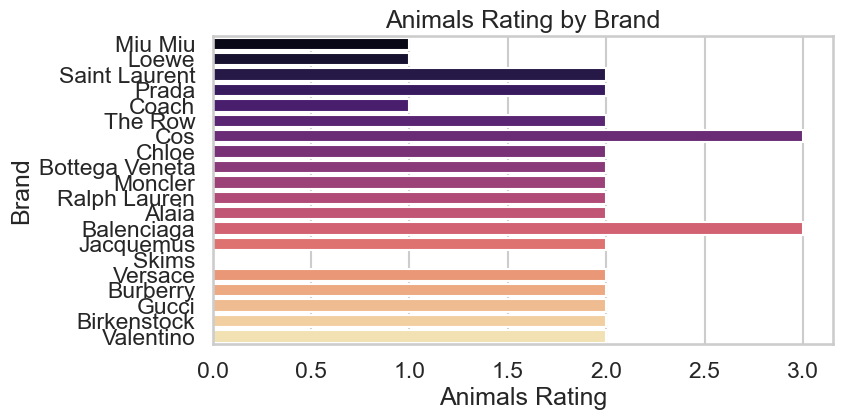

In [35]:
# Now create a bar plot for the Animals ratings
plt.figure(figsize=(8, 4))
sns.barplot(x='Animals rating', y='Brand', data=df_brands, palette='magma')
plt.title('Animals Rating by Brand')
plt.xlabel('Animals Rating')
plt.show() 

In [5]:
grouped = df_brands.groupby(['Holding', 'Ticker holding'])['Brand'].apply(', '.join).reset_index()
grouped

,Holding,Ticker holding,Brand
0,Burberry Group plc,BRBY.L,Burberry
1,Capri Holdings,CPRI,Versace
2,H&M Group,HM-B.ST,Cos
3,Kering,KER.PA,"Saint Laurent, Bottega Veneta, Balenciaga, Gucci"
4,LVMH,MC.PA,Loewe
5,Moncler S.p.A.,MONC.MI,Moncler
6,Prada Group,1913.HK,"Miu Miu, Prada"
7,Private - Kim Kardashian,,Skims
8,Private - Olsen twins,,The Row
9,Private - Simon Porte Jacquemus,,Jacquemus


In [43]:
from datetime import timedelta

# Extract tickers
tickers = grouped['Ticker holding'].unique()

# Prepare storage for data
all_data = []

# Loop through tickers and fetch data
for ticker in tickers:
    try:
        # Fetch historical data
        ticker_data = yf.Ticker(ticker).history(period='5y')
        ticker_data['Ticker'] = ticker  # Add a column with the ticker
        
        # Currency information
        info = yf.Ticker(ticker).info
        ticker_data['Currency'] = info.get('currency', 'N/A')  # Add currency information
        
        # Append the data to the list
        all_data.append(ticker_data)
        print(f"Data for {ticker} retrieved successfully.")

    except Exception as e:
        print(f"Failed to retrieve data for {ticker}: {e}")

# Concatenate all data into a single DataFrame
if all_data:
    big_data = pd.concat(all_data)
    big_data.reset_index(inplace=True)  # Reset index to have a flat structure
else:
    big_data = pd.DataFrame()  # Return empty DataFrame if no data

Data for BRBY.L retrieved successfully.
Data for CPRI retrieved successfully.
Data for HM-B.ST retrieved successfully.
Data for KER.PA retrieved successfully.
Data for MC.PA retrieved successfully.
Data for MONC.MI retrieved successfully.
Data for 1913.HK retrieved successfully.
Failed to retrieve data for : Empty ticker name
Data for BIRK retrieved successfully.
Data for RL retrieved successfully.
Data for CFR.SW retrieved successfully.
Data for TPR retrieved successfully.


In [44]:
big_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Currency
0,2020-10-23 00:00:00+01:00,1476.029931,1500.996608,1471.535929,1486.016602,2147270,0.0,0.0,BRBY.L,GBp
1,2020-10-26 00:00:00+00:00,1457.055300,1508.486656,1411.446130,1413.613281,1346998,0.0,0.0,BRBY.L,GBp
2,2020-10-27 00:00:00+00:00,1417.108629,1419.605297,1383.653281,1406.123291,956763,0.0,0.0,BRBY.L,GBp
3,2020-10-28 00:00:00+00:00,1382.155293,1398.633301,1334.219271,1361.682617,1160195,0.0,0.0,BRBY.L,GBp
4,2020-10-29 00:00:00+00:00,1360.683901,1382.654577,1346.702562,1366.675903,1160050,0.0,0.0,BRBY.L,GBp
...,...,...,...,...,...,...,...,...,...,...
13120,2025-10-16 00:00:00-04:00,117.430000,118.379997,115.680000,116.510002,1432100,0.0,0.0,TPR,USD
13121,2025-10-17 00:00:00-04:00,115.669998,117.300003,115.099998,116.820000,1908500,0.0,0.0,TPR,USD
13122,2025-10-20 00:00:00-04:00,117.639999,117.750000,115.830002,116.339996,1442300,0.0,0.0,TPR,USD
13123,2025-10-21 00:00:00-04:00,117.870003,117.949997,116.000000,117.139999,2091700,0.0,0.0,TPR,USD


In [45]:
big_data = big_data.drop(['High', 'Low', 'Volume', 'Dividends',
       'Stock Splits'], axis=1)

big_data 

,Date,Open,Close,Ticker,Currency
0,2020-10-23 00:00:00+01:00,1476.029931,1486.016602,BRBY.L,GBp
1,2020-10-26 00:00:00+00:00,1457.055300,1413.613281,BRBY.L,GBp
2,2020-10-27 00:00:00+00:00,1417.108629,1406.123291,BRBY.L,GBp
3,2020-10-28 00:00:00+00:00,1382.155293,1361.682617,BRBY.L,GBp
4,2020-10-29 00:00:00+00:00,1360.683901,1366.675903,BRBY.L,GBp
...,...,...,...,...,...
13120,2025-10-16 00:00:00-04:00,117.430000,116.510002,TPR,USD
13121,2025-10-17 00:00:00-04:00,115.669998,116.820000,TPR,USD
13122,2025-10-20 00:00:00-04:00,117.639999,116.339996,TPR,USD
13123,2025-10-21 00:00:00-04:00,117.870003,117.139999,TPR,USD


In [ ]:
# Ensure the 'Date' column is in datetime format
big_data['Date'] = pd.to_datetime(big_data['Date'], utc=True)


# Extract day, month, and year and create a new column in your desired format
big_data['day-month-year'] = big_data['Date'].dt.strftime('%d-%m-%Y')

specific_dates = ['22-10-2020', '22-10-2025']

# Filter the rows where 'day-month-year' matches any of the specific dates
filtered_data = big_data.loc[big_data['day-month-year'].isin(specific_dates)]



filtered_data = filtered_data.drop(['Date'], axis=1)




In [47]:
filtered_data 

,Open,Close,Ticker,Currency,day-month-year
0,1476.029931,1486.016602,BRBY.L,GBp,22-10-2020
1261,1264.500000,1298.500000,BRBY.L,GBp,22-10-2025
2516,22.320000,22.440001,CPRI,USD,22-10-2025
2517,129.406212,129.201843,HM-B.ST,SEK,22-10-2020
3775,179.000000,178.750000,HM-B.ST,SEK,22-10-2025
3776,488.969729,487.566681,KER.PA,EUR,22-10-2020
5058,332.500000,348.500000,KER.PA,EUR,22-10-2025
5059,390.161616,394.028259,MC.PA,EUR,22-10-2020
6341,622.299988,629.200012,MC.PA,EUR,22-10-2025
6342,34.837916,35.917088,MONC.MI,EUR,22-10-2020


In [48]:
pivot_data = filtered_data.pivot_table(index='Ticker', columns='day-month-year', values=['Close'])

pivot_data

Close             
day-month-year   22-10-2020   22-10-2025
Ticker                                  
1913.HK           30.749958    46.299999
BIRK                    NaN    42.990002
BRBY.L          1486.016602  1298.500000
CFR.SW            55.475105   162.750000
CPRI                    NaN    22.440001
HM-B.ST          129.201843   178.750000
KER.PA           487.566681   348.500000
MC.PA            394.028259   629.200012
MONC.MI           35.917088    53.360001
RL                      NaN   332.119995
TPR                     NaN   115.330002

In [38]:
big_data_agg = big_data.groupby(['Ticker', 'Currency']).agg({'Close': ['mean', 'min', 'max'], 'Volume': 'sum'})

# Let's format the values 
big_data_agg = big_data_agg.round(2)
big_data_agg.columns = ['_'.join(col).strip() for col in big_data_agg.columns.values]
big_data_agg.reset_index(inplace=True)  

big_data_agg

,Ticker,Currency,Close_mean,Close_min,Close_max,Volume_sum
0,1913.HK,HKD,47.68,28.03,68.35,1583783770
1,BIRK,USD,49.74,36.38,63.57,743656300
2,BRBY.L,GBp,1600.13,571.00,2638.95,2191028184
3,CFR.SW,CHF,115.97,50.63,181.19,1468422277
4,CPRI,USD,42.15,12.48,70.76,3112053900
5,HM-B.ST,SEK,141.35,87.06,185.98,4263225079
6,KER.PA,EUR,420.62,153.52,703.42,310860484
7,MC.PA,EUR,631.81,370.23,858.37,542219285
8,MONC.MI,EUR,51.83,31.48,67.55,997797149
9,RL,USD,145.70,60.57,334.98,1168527200
